In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n225_df = pd.read_csv('./data/nikkei_stock_average_daily_jp.csv',
                      parse_dates=True, index_col=['Date'])
vi_df = pd.read_csv('./data/nikkei_stock_average_vi_daily_jp.csv',
                    parse_dates=True, index_col=['Date'])

n225_vi_df = pd.concat([n225_df['Close'], vi_df['Close']], axis=1)
n225_vi_df.columns = ['n225', 'VI']

s_df = pd.read_pickle('./data/s.pickle')
op_pn1 = pd.read_pickle('./data/op1.pickle')
op_pn2 = pd.read_pickle('./data/op2.pickle')
op_pn = {'1803': op_pn1, '1804': op_pn2}

### ボラティリティの特性

* 権利行使価格ごとに異なる
* プットのIV > コールのIV
* ATM付近が最も低くなる

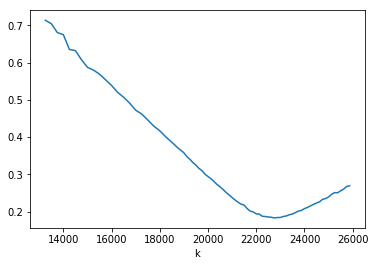

In [3]:
op_pn['1803'].loc['2018-02-16 15:15']['iv'].plot();

### ボラティリティの変化

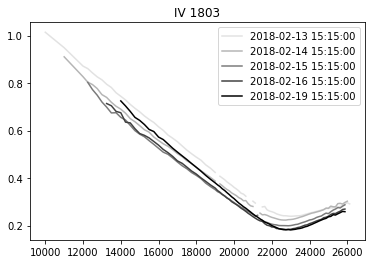

In [4]:
n = 5
periods = op_pn['1803'].keys()
colors = plt.get_cmap('Greys')(np.linspace(0, 1, n + 1))[1:]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(n):
    label = periods[i]
    x = op_pn['1803'].loc[periods[i]].index
    y = op_pn['1803'].loc[periods[i]]['iv']
    ax.plot(x, y, color=colors[i], label=label)

ax.set_title('IV 1803')
ax.legend()
plt.show()

* 権利行使価格が多数ある
* 限月が複数ある
* 全てのデータを時系列に並べるのは非現実的
* 一つの指標としてまとまったものがあると便利

### 日経平均ボラティリティー・インデックス

* オプションのプレミアムを元に算出した指標
* 日経平均株価の将来の変動をどのように想定しているかがわかる
* 満期が30日になるように線形補間

> 参考: 日経平均プロフィル -> 日経平均ボラティリティー・インデックス  
> https://indexes.nikkei.co.jp/nkave/index/profile?idx=nk225vi

### 時系列データ

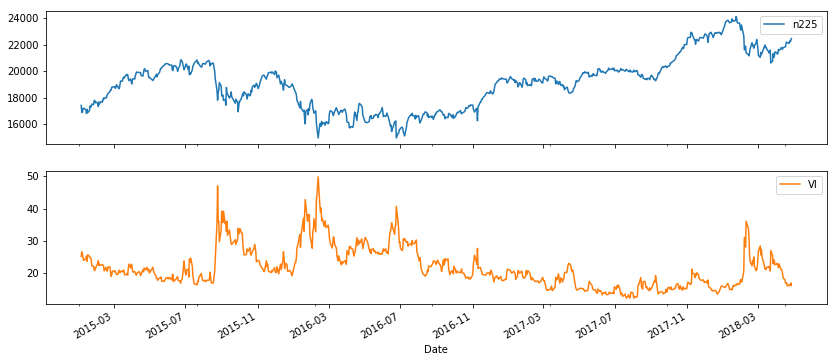

In [5]:
n225_vi_df.dropna().plot(subplots=True, figsize=(14, 6));

* ボラティリティが急激に上昇したら、急激に下落する  
  -> ボラティリティスパイク
* 平均回帰性
* 原資産価格の変動と比較して、特性があり動きが読みやすい

### 日経平均株価とVIの相関

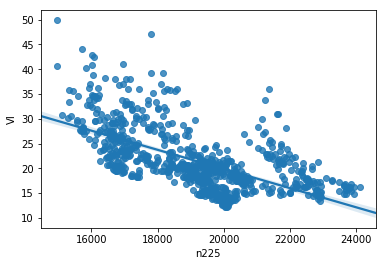

In [6]:
sns.regplot(x='n225', y='VI', data=n225_vi_df);

* 日経平均株価とVIには負の相関がある
* 特に原資産価格が急落した場合にはボラティリティが上昇しやすい